In [122]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Map



In [98]:
df = pd.read_csv("./seoul_closed_clothes_final.csv",encoding='utf-8')

----

구별 의류수거함 총 갯수

In [99]:
df_1 = df.groupby('구')[['주소']].count().reset_index()

In [100]:
df_1.columns=['구','총갯수']

In [101]:
df_total = df_1.sort_values('총갯수', ascending=False)

In [102]:
df_total

,구,총갯수
3,관악구,887
17,은평구,832
15,양천구,709
0,강남구,667
2,강서구,622
14,송파구,578
6,금천구,549
1,강동구,524
7,동대문구,512
10,서대문구,506


/tmp/ipykernel_11852/419612781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=labels, y=values, palette='summer')


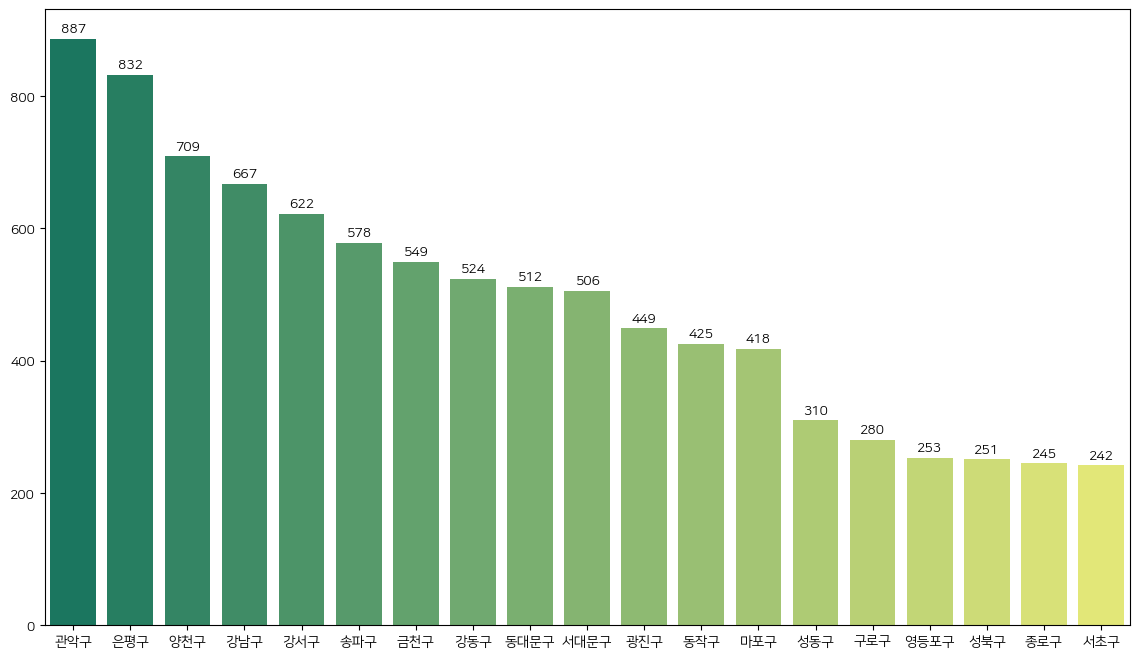

In [116]:
plt.rcParams["font.family"] = 'NanumSquare'
plt.figure(figsize=(14, 8))

labels = df_total['구'].to_list()
values = df_total['총갯수'].to_list()

barplot = sns.barplot(x=labels, y=values, palette='summer')

# 각 막대에 주석 추가
for index, value in enumerate(df_total['총갯수']):
    plt.text(index, value+15, f'{value}', va='center', ha='center', color='black', fontsize=10)


plt.show()

---

choropleth

In [117]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'


m = folium.Map(
    location = [37.566345, 126.977893],
    zoom_start = 10.5,
    tiles='Cartodb Positron'
)

folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = df_1,
    columns = ['구','총갯수'],
    key_on = 'feature.properties.name',
    nan_fill_color='white',
    fill_color = 'GnBu',
    fill_opacity=0.7,
    line_opacity = 0.2,
    legend_name='갯수'
).add_to(m)

m

---

구별 가구수

In [3]:
df_household = pd.read_csv("./seoul_household.csv", encoding='utf-8')

In [5]:
df_household = df_household.drop(['Unnamed: 0'], axis=1).set_index('구')

In [39]:
#구별 가구수를 총 인구당 비율로 계산
for index, row in df_household.iterrows():
    base_value = row.iloc[0]
    df_household.loc[index] = round(row / base_value * 100, 2)

print(df_household)

/tmp/ipykernel_34218/1602400565.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.12' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_household.loc[index] = round(row / base_value * 100, 2)
/tmp/ipykernel_34218/1602400565.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.57' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_household.loc[index] = round(row / base_value * 100, 2)
/tmp/ipykernel_34218/1602400565.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.41' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_household.loc[index] = round(row / base_value * 100, 2)
/tmp/ipykernel_34218/1602400565.py

       합계  1인가구수  2인가구수  3인가구수  4인가구수  5인가구수  6인가구수  7인이상가구수
구                                                           
종로구   100  44.12  25.57  16.41  10.78   2.46   0.55     0.11
중구    100  44.88  27.00  15.91   9.50   2.12   0.47     0.13
용산구   100  42.08  27.19  17.25  10.52   2.39   0.48     0.10
성동구   100  37.88  26.46  19.66  12.91   2.47   0.51     0.11
광진구   100  44.35  24.08  16.84  11.78   2.36   0.48     0.11
동대문구  100  43.72  24.45  17.13  11.45   2.59   0.52     0.13
중랑구   100  37.72  27.96  18.72  12.25   2.71   0.51     0.13
성북구   100  36.54  25.87  19.63  14.21   3.03   0.59     0.13
강북구   100  38.95  28.14  18.32  11.46   2.49   0.51     0.12
도봉구   100  30.82  30.07  21.45  14.10   2.89   0.53     0.14
노원구   100  30.73  27.77  21.87  16.21   2.88   0.43     0.10
은평구   100  33.52  29.05  20.17  13.52   3.03   0.58     0.13
서대문구  100  39.91  25.60  18.52  12.71   2.65   0.50     0.12
마포구   100  42.29  25.30  17.58  11.91   2.38   0.45     0.10
양천구   100  26.87  26.91 

In [63]:
# 1인가구 기준으로 정렬
df_household = df_household.sort_values('1인가구수', ascending=True)

In [95]:
df_household1 = df_household.copy()

In [96]:
df_household1= df_household1.drop('합계', axis=1)

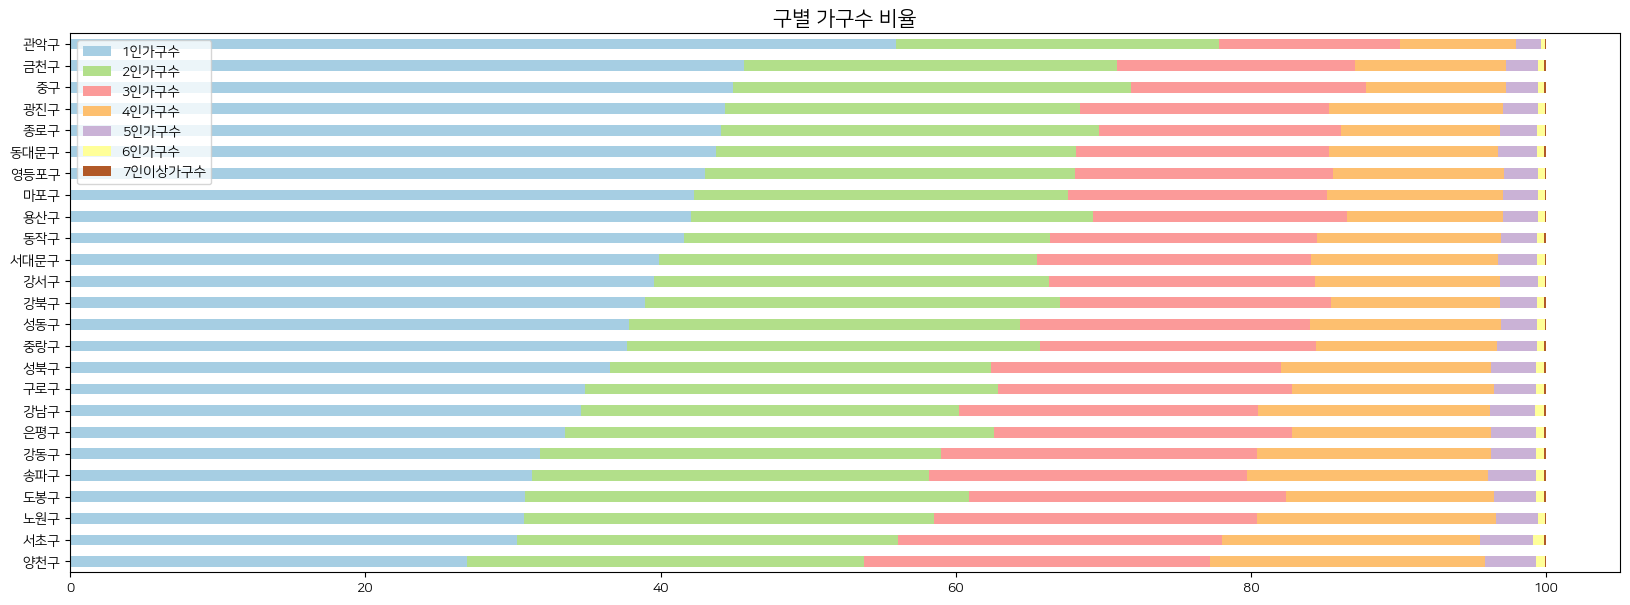

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

df_household1.plot.barh( stacked=True, figsize=(20,7), colormap='Paired')
plt.title('구별 가구수 비율', fontsize=15)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

-----

의류수거함 갯수와 가구수의 상관관계 유무

In [103]:
df_merge = pd.merge(df_total, df_household1, on='구' , how='inner')

In [104]:
df_merge

,구,총갯수,1인가구수,2인가구수,3인가구수,4인가구수,5인가구수,6인가구수,7인이상가구수
0,관악구,887,55.92,21.90,12.27,7.83,1.69,0.32,0.08
1,은평구,832,33.52,29.05,20.17,13.52,3.03,0.58,0.13
2,양천구,709,26.87,26.91,23.45,18.62,3.47,0.58,0.11
3,강남구,667,34.63,25.59,20.27,15.70,3.07,0.62,0.12
4,강서구,622,39.56,26.74,18.03,12.56,2.54,0.47,0.09
5,송파구,578,31.31,26.89,21.51,16.34,3.24,0.59,0.12
6,금천구,549,45.65,25.29,16.10,10.20,2.21,0.42,0.13
7,강동구,524,31.85,27.15,21.41,15.82,3.09,0.56,0.12
8,동대문구,512,43.72,24.45,17.13,11.45,2.59,0.52,0.13
9,서대문구,506,39.91,25.60,18.52,12.71,2.65,0.50,0.12


In [105]:
df_merge1 =df_merge.drop('구', axis=1)

In [106]:
df_merge1

,총갯수,1인가구수,2인가구수,3인가구수,4인가구수,5인가구수,6인가구수,7인이상가구수
0,887,55.92,21.90,12.27,7.83,1.69,0.32,0.08
1,832,33.52,29.05,20.17,13.52,3.03,0.58,0.13
2,709,26.87,26.91,23.45,18.62,3.47,0.58,0.11
3,667,34.63,25.59,20.27,15.70,3.07,0.62,0.12
4,622,39.56,26.74,18.03,12.56,2.54,0.47,0.09
5,578,31.31,26.89,21.51,16.34,3.24,0.59,0.12
6,549,45.65,25.29,16.10,10.20,2.21,0.42,0.13
7,524,31.85,27.15,21.41,15.82,3.09,0.56,0.12
8,512,43.72,24.45,17.13,11.45,2.59,0.52,0.13
9,506,39.91,25.60,18.52,12.71,2.65,0.50,0.12


In [107]:
df_corr = round(df_merge1.corr(), 2)

/home/encore/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumSquare.
  fig.canvas.draw()
/home/encore/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumSquare.
  fig.canvas.print_figure(bytes_io, **kw)


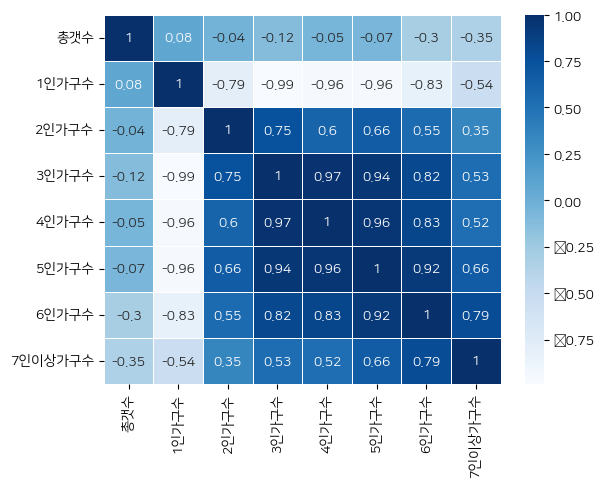

In [108]:
sns.heatmap(df_corr, annot=True, linewidth=.5, cmap='Blues')
plt.show()


/home/encore/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumSquare.
  fig.canvas.draw()
/home/encore/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumSquare.
  fig.canvas.print_figure(bytes_io, **kw)


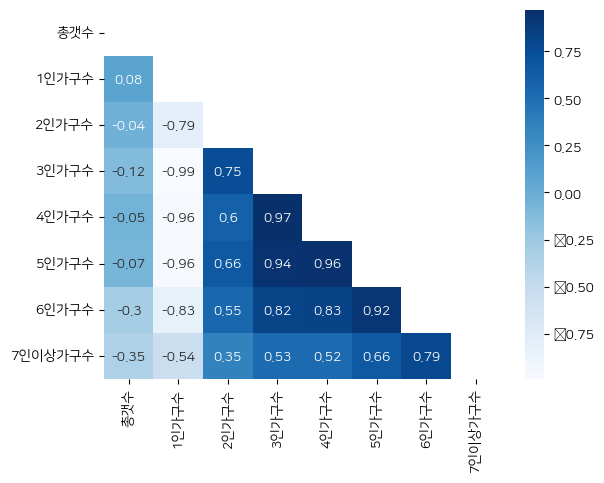

In [111]:
corr = df_corr
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='Blues', annot=True)
plt.show()


---

결론 - 1인가구 top5 / 의류수거함 top5 더 필요한 지역